## ASSIGNED exam3-2 eigenvalue



CLOSED: <span class="timestamp-wrapper"><span class="timestamp">[2018-12-10 Mon 11:45]</span></span>

:LABEL:    exam3-2
:POINTS:   3
:TYPE:     exam-3
:RUBRIC:   default
:RUBRIC\_CATEGORIES: technical, presentation
:RUBRIC\_WEIGHTS: 0.8, 0.2
:DUEDATE:  2018-12-10 16:00:00
:GRADER:   Mingjie Liu

**This is an exam. You must be present in the exam room to get credit for this problem unless you have prior permission from the instructor. You may not talk during the exam except to ask an instructor a question. By turning this in, you agree that this work is your own, and you did not get unauthorized help to complete it or provide unauthorized help to anyone else. You may not modify your exam answer after the due time without permission.**

We have mostly focused on numerical solutions to ODEs. Sometimes, it is possible to leverage Python to obtain analytical solutions though. This problem will focus on a way to do that. We will focus on these equations:

$y_1'(t) = -0.02 y_1 + 0.02 y_2$

$y_2'(t) = 0.02 y_1 - 0.02 y_2$

with the initial conditions that $y_1(0) = 0$ and $y_2(0) = 150$.

We can rewrite the equations in matrix form:

$\mathbf{y'} = \mathbf{A} \mathbf{y}$

Here we have $\mathbf{y'} = \left[\begin{array}{c} y_1'(t) \\ y_2'(t)\end{array}\right]$ and $\mathbf{y} = \left[\begin{array}{c} y_1(t) \\ y_2(t)\end{array}\right]$. $\mathbf{A}$ is the array of coefficients.

This is a set of constant coefficient, coupled ODEs. We can try a solution of the form:

$\mathbf{y} = \mathbf{x} e^{\lambda t}$, where we have an unknown vector $\mathbf{x}$ and $\lambda$, and we seek to find values for these that solve the equations.

If you plug this in to the equations then we find:

$\mathbf{y'} = \lambda \mathbf{x} e^{\lambda t} = \mathbf{A} \mathbf{x} e^{\lambda t}$

Or, with some minor rearrangement:

$\mathbf{A} \mathbf{x} = \lambda \mathbf{x}$

This is an eigenvalue problem, and the solutions to it are the pairs of eigenvalues ($\lambda$) and corresponding eigenvectors ($\mathbf{x}$).

Find the eigenvalues and eigenvectors of this system of equations:



The solution to the system of ODEs is then a linear combination defined by:

$\mathbf{y(t)} = c_1 \mathbf{x_1} e^{\lambda_1 t} + c_2 \mathbf{x_2} e^{\lambda_2 t}$

where $c_i$ are arbitrary constants, and $\mathbf{x_i}$ is the i<sup>th</sup> eigenvector that corresponds to the i<sup>th</sup> eigenvalue $\lambda_i$. To find the values of $c_i$ we must use the initial conditions. At $t=0$ we can express this in the form:

\begin{equation}
\left[\begin{array}{c}y_1(0) \\ y_2(0)\end{array}\right]=
[\begin{array}{cc}\mathbf{x_1} & \mathbf{x_2}\end{array}]
\left[\begin{array}{c}c_1\\c_2\end{array}\right]
\end{equation}

where $[\begin{array}{cc}\mathbf{x_1} & \mathbf{x_2}\end{array}]$ is an array with $\mathbf{x_i}$ in the i<sup>th</sup> column, in other words it is an array of the eigenvectors in column form.

Solve this linear equation for the unknown coefficients $\mathbf{c}$.



Finally, combine all of this information to get the complete solution

$\mathbf{y(t)} = c_1 \mathbf{x_1} e^{\lambda_1 t} + c_2 \mathbf{x_2} e^{\lambda_2 t}$. There is not a simple matrix algebra way to do this, so I suggest you do it as:

$y1(t) = c_1 \mathbf{x_1}[0] e^{\lambda_1 t} + c_2 \mathbf{x_2}[0] e^{\lambda_2 t}$

and

$y2(t) = c_1 \mathbf{x_1}[1] e^{\lambda_1 t} + c_2 \mathbf{x_2}[1] e^{\lambda_2 t}$

and plot the solution for $y_1(t)$ and $y_2(t)$ from t=0 to t=100.



### solution



First we find the eigenvalues and eigenvectors.



In [1]:
import numpy as np

A = np.array([[-0.02, 0.02],
              [0.02, -0.02]])

evals, evecs = np.linalg.eig(A)

print(evals, evecs)

# Out[1]:
# output
[ 0.   -0.04] [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Next, solve for the unknown coefficients.



In [1]:
c = np.linalg.solve(evecs, [0, 150])
c

# Out[2]:
# text/plain
array([ 106.06601718,  106.06601718])

Finally we combine them.



# Out[4]:




# image/png

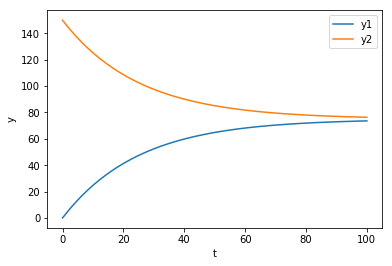

In [1]:
t = np.linspace(0, 100)

x1 = evecs[:, 0]
x2 = evecs[:, 1]

y1 = c[0] * x1[0] * np.exp(evals[0] * t) + c[1] * x2[0] * np.exp(evals[1] * t)
y2 = c[1] * x1[1] * np.exp(evals[0] * t) + c[1] * x2[1] * np.exp(evals[1] * t)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(t, y1, t, y2)
plt.legend(['y1', 'y2'])
plt.xlabel('t')
plt.ylabel('y')

Here is the numpy way of writing this solution. It is more advanced syntax than we have used in class and involves combinations of matrix algebra, elementwise operations and broadcasting. You did not have to do this.



# Out[5]:




# image/png

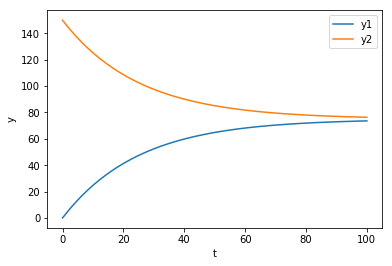

In [1]:
y = c[None, :] * evecs @ np.array([np.exp(evals[0] * t),
                                   np.exp(evals[1] * t)])
# transpose y so it is in columns.
plt.plot(t, y.T)
plt.legend(['y1', 'y2'])
plt.xlabel('t')
plt.ylabel('y')